In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# data = pd.read_csv('')

In [3]:
data = load_boston()

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [4]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
# data = pd.read_csv('................')

In [6]:
# target = data['MEDV']

In [7]:
# data = data.drop(['MEDV'], axis = 1)

In [8]:
# data = np.array(data)
# target = np.array(target)

In [9]:
data.shape

(506, 13)

In [10]:
target.shape

(506,)

In [11]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

In [12]:
data = (data - u)/std

In [13]:
u.shape

(13,)

In [14]:
ones = np.ones((data.shape[0], 1))

In [15]:
data = np.hstack((ones, data))

In [16]:
data.shape

(506, 14)

In [17]:
split = 0.8
X_train = data[:int(data.shape[0] * split), :]
Y_train = target[:int(target.shape[0] * split)]
X_test = data[int(data.shape[0] * split):, :]
Y_test = target[int(target.shape[0] * split):]

In [18]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 14) (102, 14) (404,) (102,)


In [19]:
def hypothesis(X, weight):
    h_x = 0
    for j in range(X.shape[0]):
        h_x += X[j] * weight[j]
    return h_x

In [20]:
def loss(X, Y, weight):
    error = 0
    
    for i in range(X.shape[0]):
        pred = hypothesis(X[i], weight)
        error += (pred - Y[i])**2
        
    return error/X.shape[0]

In [21]:
def gradient(X, Y, weight):
    grad = np.zeros((X.shape[1], 1))
    
    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
            pred = hypothesis(X[i], weight)
            
            grad[j] += (pred - Y[i]) * X[i, j]
            
    return grad/X.shape[0]

In [22]:
def gradient_descent(X, Y):
    weights = np.zeros((X.shape[1], 1))
    epochs = 1000
    lr_rate = 0.03
    list_loss = []
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        list_loss.append(loss(X, Y, weights))
        print(f'On: {i}', end = '\r')
        for j in range(X.shape[1]):
            weights[j] = weights[j] - lr_rate * grad[j]
    return weights, list_loss

In [23]:
weights, list_loss = gradient_descent(X_train, Y_train)

In [24]:
weights

array([[23.03829851],
       [-1.62971667],
       [ 0.98212177],
       [ 0.19169693],
       [ 0.51555901],
       [-1.6165734 ],
       [ 3.34953527],
       [ 0.05169315],
       [-2.74332546],
       [ 3.26287864],
       [-1.94644908],
       [-1.71584799],
       [ 0.03474858],
       [-3.81536968]])

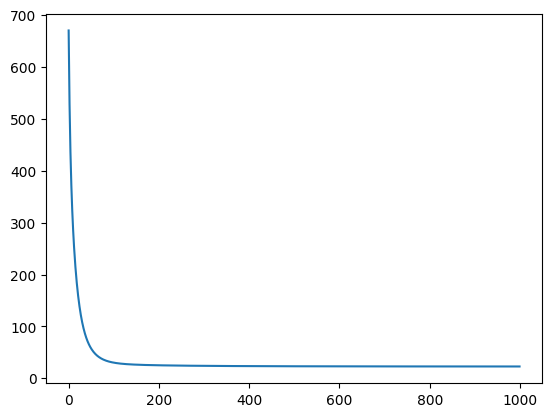

In [25]:
plt.plot(list_loss)

In [26]:
pred = []

for i in range(X_test.shape[0]):
    pred.append(hypothesis(X_test[i], weights))

In [27]:
for i in range(Y_test.shape[0]):
    print(Y_test[i], pred[i])

8.5 [5.94882022]
5.0 [4.30736368]
11.9 [6.48645843]
27.9 [21.00464363]
17.2 [14.91243316]
27.5 [22.95037975]
15.0 [15.93800074]
17.2 [21.18739245]
17.9 [3.53267278]
16.3 [11.84598615]
7.0 [-4.94566956]
7.2 [13.62192055]
7.5 [18.40187734]
10.4 [8.29082494]
8.8 [5.37564147]
8.4 [19.52057565]
16.7 [21.87756024]
14.2 [20.32351647]
20.8 [19.84515779]
13.4 [17.8425167]
11.7 [18.56163277]
8.3 [13.85511341]
10.2 [20.06440866]
10.9 [16.49360624]
11.0 [18.3862985]
9.5 [17.5115036]
14.5 [22.17122927]
14.1 [23.05943135]
16.1 [25.71954739]
14.3 [21.76785587]
11.7 [19.79641888]
13.4 [17.74841404]
9.6 [19.24556932]
8.7 [13.25581404]
8.4 [8.57860558]
12.8 [14.02023635]
10.5 [12.87362437]
17.1 [19.1499129]
18.4 [20.68164314]
15.4 [19.95776278]
10.8 [13.81288692]
11.8 [16.80345135]
14.9 [20.38028543]
12.6 [19.8459915]
14.1 [19.04134937]
13.0 [19.92316654]
13.4 [22.35384637]
15.2 [22.09662451]
16.1 [20.68348231]
17.8 [25.49814694]
14.9 [20.82438589]
14.1 [21.15039381]
12.7 [17.87413658]
13.5 [17.84488731

In [28]:
list_loss[-1]

array([22.84297144])